Importing libraries and packages for the model

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report

In [5]:
data=pd.read_csv("C:\\Users\\Suman Harshvardhan\\Documents\\ML\\weatherAUS.csv")
print(data.head())

         Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1  2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2  2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3  2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4  2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  Humidity3pm  \
0           W           44.0          W  ...        71.0         22.0   
1         WNW           44.0        NNW  ...        44.0         25.0   
2         WSW           46.0          W  ...        38.0         30.0   
3          NE           24.0         SE  ...        45.0         16.0   
4           W           41.0        ENE  ...        82.0         33.0   

   Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  \
0       1007.7    

In [6]:
print(data.shape)
print(data.info())

(145460, 23)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       8

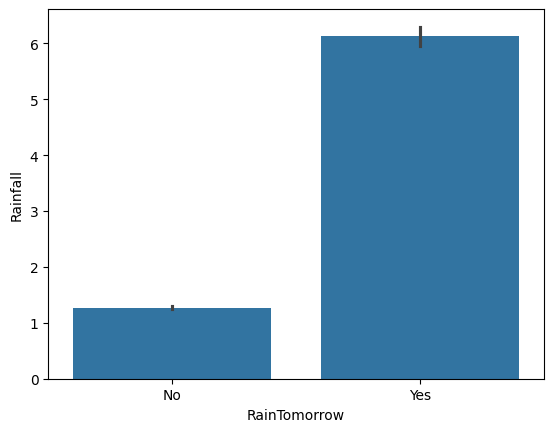

In [7]:
sns.barplot(y="Rainfall",x="RainTomorrow",data=data)
plt.show()

Splitting the columns

In [8]:
X=data.iloc[:,[1,2,3,4,5,6,7,8,11,12,13,14,15,16,17,18,19,20,21]].values
y=data.iloc[:,[-1]].values

In [9]:
print(X)

[['Albury' 13.4 22.9 ... 16.9 21.8 'No']
 ['Albury' 7.4 25.1 ... 17.2 24.3 'No']
 ['Albury' 12.9 25.7 ... 21.0 23.2 'No']
 ...
 ['Uluru' 5.4 26.9 ... 12.5 26.1 'No']
 ['Uluru' 7.8 27.0 ... 15.1 26.0 'No']
 ['Uluru' 14.9 nan ... 15.0 20.9 'No']]


In [10]:
print(y)

[['No']
 ['No']
 ['No']
 ...
 ['No']
 ['No']
 [nan]]


It will replace the NULL values with most frequent values in the data

In [11]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan,strategy='most_frequent')
X = imputer.fit_transform(X)
y = imputer.fit_transform(y)

In [12]:
print(X)

[['Albury' 13.4 22.9 ... 16.9 21.8 'No']
 ['Albury' 7.4 25.1 ... 17.2 24.3 'No']
 ['Albury' 12.9 25.7 ... 21.0 23.2 'No']
 ...
 ['Uluru' 5.4 26.9 ... 12.5 26.1 'No']
 ['Uluru' 7.8 27.0 ... 15.1 26.0 'No']
 ['Uluru' 14.9 20.0 ... 15.0 20.9 'No']]


In [13]:
print(y)

[['No']
 ['No']
 ['No']
 ...
 ['No']
 ['No']
 ['No']]


In [14]:
RainTomorrow=pd.get_dummies(data["RainTomorrow"],drop_first=True)
RainToday=pd.get_dummies(data["RainToday"],drop_first=True)
print(RainTomorrow)
print(RainToday)

          Yes
0       False
1       False
2       False
3       False
4       False
...       ...
145455  False
145456  False
145457  False
145458  False
145459  False

[145460 rows x 1 columns]
          Yes
0       False
1       False
2       False
3       False
4       False
...       ...
145455  False
145456  False
145457  False
145458  False
145459  False

[145460 rows x 1 columns]


This will convert the strings to float values for better evaluation

In [15]:
le1=LabelEncoder()
X[:,0]=le1.fit_transform(X[:,0])
le2=LabelEncoder()
X[:,4]=le2.fit_transform(X[:,4])
le3=LabelEncoder()
X[:,6]=le3.fit_transform(X[:,6])
le4=LabelEncoder()
X[:,7]=le4.fit_transform(X[:,7])
le5=LabelEncoder()
X[:,-1]=le5.fit_transform(X[:,-1])
le6=LabelEncoder()
y[:,-1]=le6.fit_transform(y[:,-1])

In [16]:
print(X)

[[2 13.4 22.9 ... 16.9 21.8 0]
 [2 7.4 25.1 ... 17.2 24.3 0]
 [2 12.9 25.7 ... 21.0 23.2 0]
 ...
 [41 5.4 26.9 ... 12.5 26.1 0]
 [41 7.8 27.0 ... 15.1 26.0 0]
 [41 14.9 20.0 ... 15.0 20.9 0]]


In [17]:
y= np.array(y,dtype=float)
print(y)

[[0.]
 [0.]
 [0.]
 ...
 [0.]
 [0.]
 [0.]]


We are splitting the test and train data sets and given the test size

In [18]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)


In [19]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(116368, 19)
(29092, 19)
(116368, 1)
(29092, 1)


We will use random forest for this model and use the corresponding function to make the model learn

In [20]:
from sklearn.linear_model import LinearRegression
classifier = RandomForestClassifier(n_estimators=100,random_state=0)
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)


c:\Users\Suman Harshvardhan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:1351: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


This is the accuracy score of the model

In [21]:
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.8554585453045511
              precision    recall  f1-score   support

         0.0       0.87      0.96      0.91     22726
         1.0       0.76      0.49      0.60      6366

    accuracy                           0.86     29092
   macro avg       0.82      0.72      0.76     29092
weighted avg       0.85      0.86      0.84     29092



In [22]:
y_pred = y_pred.reshape(-1,1)
y_test = y_test.reshape(-1,1)
print(y_pred)
print(y_test)

[[0.]
 [0.]
 [0.]
 ...
 [0.]
 [0.]
 [0.]]
[[1.]
 [1.]
 [0.]
 ...
 [1.]
 [0.]
 [0.]]


In [23]:
df = np.concatenate((y_test,y_pred),axis=1)
dataframe = pd.DataFrame(df,columns=['will it Rain Tommorrow','Predition of Rain'])
print(dataframe)

       will it Rain Tommorrow  Predition of Rain
0                         1.0                0.0
1                         1.0                0.0
2                         0.0                0.0
3                         0.0                0.0
4                         0.0                0.0
...                       ...                ...
29087                     0.0                1.0
29088                     0.0                0.0
29089                     1.0                0.0
29090                     0.0                0.0
29091                     0.0                0.0

[29092 rows x 2 columns]
